#K 近傍法による分類と可視化

In [ ]:
# 4種類のフルーツを重量と色で分類する．

# フルーツは数値だが，順に "apple", "mandarin","orange","lemon" を表す．
# K 近傍法とは，(Xの空間で）データに近い K(ハイパーパラメーター:自分で変えられる) 個のデータの値(y)の多数決で分類を行う最も簡単な分類手法である．
# 以下のようにしてクラスをインポートできる．

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [ ]:
# クラス KNeighborsClassifier は引数 n_neighbors でパラメータK を設定できる．
# KK を色々変えて実験せよ．

fruit = pd.read_csv("http://logopt.com/data/fruit_simple.csv")
fruit.head()

,fruit_label,mass,color_score
0,1,192,0.55
1,1,180,0.59
2,1,176,0.60
3,2,86,0.80
4,2,84,0.79


正解率= 0.9152542372881356


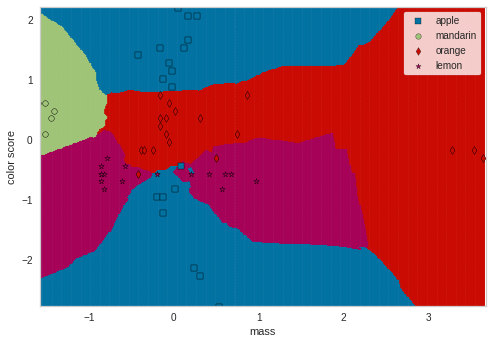

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz
from sklearn import metrics

X=fruit.drop("fruit_label",axis=1)
y=fruit.fruit_label
X = StandardScaler().fit_transform(X) #可視化のためにスケーリングしておく(正規化する)

knn = KNeighborsClassifier(5) #Kを5にして実験,KNeighborsClassifier(ハイパーパラメータ)
knn.fit(X, y) # 訓練
y_pred = knn.predict(X) #元データで予想

print("正解率=",metrics.accuracy_score(y, y_pred))

viz = DecisionViz(
    knn, title="Nearest Neighbors",
    features=['mass', 'color score'], classes=["apple", "mandarin","orange","lemon"]
)

# features=[行, 列]
# 境界線 - classes=["apple", "mandarin","orange","lemon"]

viz.fit(X, y)
viz.draw(X, y)
viz.show();

#Kを1にしたら,1.0 - 理由は自分を評価しているから1.0が出る,そのため違うデータで評価を行わなければいけない

In [ ]:
# 問題（アヤメ）
# irisデータに対して，K 近傍法で元データを予測したしたときの正解率を計算せよ．パラメータ K（近傍の数）が5のときはどうか？
# また，パラメータ K が 1のときはどうか？

# 注意：DecisionVizによる可視化は2次元データではないので、そのままではできない． 適当な特徴ベクトルを切り出してから可視化を行え．